# Non-linear models

For this exercise we start with a dataset which consist in a time series and the change of the Bitcoin price along these time, our dataset takes the dates from January 1, 2022 to March 16, 2022, and consists in the daily registration of prices.

The idea is to read and analyze the price behavior along the days and propose a non-linear model that can adjust the behavior values and determine the future daily price a week ahead, and then compare this prediction with the real values. 

The information is given in a CSV format, so we have to assign a dataframe to a new variable and open the CSV file. The dataframe will allow us to see and work with the data easily, so let's create the variable "dataBitcoin" and see the dataset.

In [195]:
using CSV
using DataFrames

In [196]:
dataBitcoin = DataFrame(CSV.File("C:/Users/maria/Desktop/Universidad/2022-I/Matemáticas para ML/Databases/Bitcoin_22.csv"))
dataBitcoin

,Date,Bitcoin_Price
,Date…,Float64
1,2022-01-01,47686.8
2,2022-01-02,47345.2
3,2022-01-03,46458.1
4,2022-01-04,45897.6
5,2022-01-05,43569.0
6,2022-01-06,43160.9
7,2022-01-07,41557.9
8,2022-01-08,41733.9
9,2022-01-09,41911.6


Plot dataBitcoin.

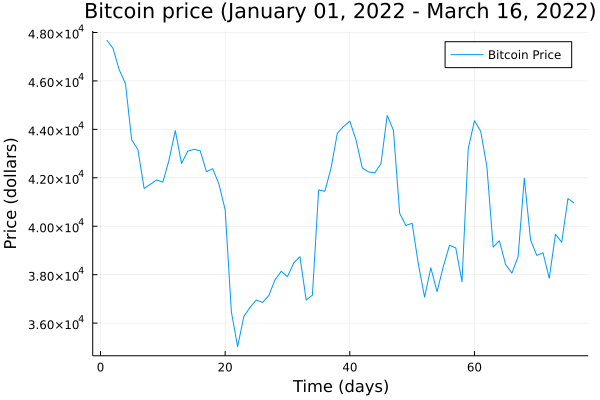

In [197]:
using Plots 
plot(dataBitcoin.Bitcoin_Price, title = "Bitcoin price (January 01, 2022 - March 16, 2022)", 
    label = "Bitcoin Price", 
    xlabel = "Time (days)", 
    ylabel = "Price (dollars)")

In this part we define the vectors $x$ and $y$, the first of which is the vector that takes the time in days and goes from day $1$ to day $N$ where $N$ is the lenght of the dataframe, in our case $N = 76$. The second is the vector that takes the price of the Bitcoin along the days. Later, we define the minimum, and maximum price that Bitcoin reaches.

In [198]:
N = size(dataBitcoin.Bitcoin_Price,1);
x = Array((1:N));
y = Array(dataBitcoin.Bitcoin_Price);
miny = minimum(y);
maxy= maximum(y);

Now we can construct one of the design matrices, since we're going to present two desing matrices and compare if sthe prediction fits of each one.

The first model is given by sine and cosine functions and we're going to vary their arguments, so the desing matrix have $7$ columns and one of these is a ones column this mean the intercept, in this way, the model that defines the desing matrix $A$ is given by

\begin{equation*}
a_1 + a_2\cdot sin(5\cdot \frac{\pi}{12}\cdot x) + a_3\cdot cos(5\cdot \frac{\pi}{4}\cdot x) + a_4\cdot sin(7\cdot \frac{\pi}{12}\cdot x) + a_5\cdot cos(7\cdot \frac{\pi}{4}\cdot x) +  a_6\cdot sin(11\cdot \frac{\pi}{12}\cdot x) + a_7\cdot cos(11\cdot \frac{\pi}{4}\cdot x) 
\end{equation*}

With this definition of the exercise, it only remains to solve the problem of least squares, that is, find the parameters of the model such that minimize $\| Ax -b \|_2^2$, it means

\begin{equation*}
\mbox{arg min}_{x} \| Ax - b \|_2^2
\end{equation*}



In [199]:
A = [ones(N) sin.(5*π/12*x) cos.(5*π/4*x) sin.(7*π/12*x) cos.(7*π/4*x) sin.(11*π/12*x) cos.(11*π/4*x)]

76×7 Matrix{Float64}:
 1.0   0.965926     -0.707107      0.965926     …   0.258819     -0.707107
 1.0   0.5           3.06162e-16  -0.5             -0.5          -2.44991e-15
 1.0  -0.707107      0.707107     -0.707107         0.707107      0.707107
 1.0  -0.866025     -1.0           0.866025        -0.866025     -1.0
 1.0   0.258819      0.707107      0.258819         0.965926      0.707107
 1.0   1.0          -2.69484e-15  -1.0          …  -1.0           7.34974e-15
 1.0   0.258819     -0.707107      0.258819         0.965926     -0.707107
 1.0  -0.866025      1.0           0.866025        -0.866025      1.0
 1.0  -0.707107     -0.707107     -0.707107         0.707107     -0.707107
 1.0   0.5          -2.45548e-16  -0.5             -0.5          -1.22496e-14
 1.0   0.965926      0.707107      0.965926     …   0.258819      0.707107
 1.0   6.12323e-16  -1.0           8.57253e-16      4.89983e-15  -1.0
 1.0  -0.965926      0.707107     -0.965926        -0.258819      0.707107
 ⋮       

We now solve the least square problem usign QR descomposition.

In [200]:
p = A\y

7-element Vector{Float64}:
 40759.834742796054
   154.56993834845298
    -2.334923022952766e15
    67.05113868448832
  -567.1056581229151
   206.41847556215492
     2.3349230229525865e15

Now, we have the parameters that adjusts our first model, then let's see what we obtain.

In [201]:
x̂ = A*p

76-element Vector{Float64}:
 40755.75
 40693.94968356061
 41031.5
 41251.5
 41280.75
 40664.3883872382
 40725.0
 39758.5
 40494.25
 40672.35645489652
 41322.0
 41506.5
 40732.25
     ⋮
 40398.75
 40604.15726902538
 40948.25
 41761.0
 40918.5
 41098.43686002411
 40043.0
 40013.5
 40882.75
 40416.6574959579
 41201.25
 41251.5

Plot the model with the data.

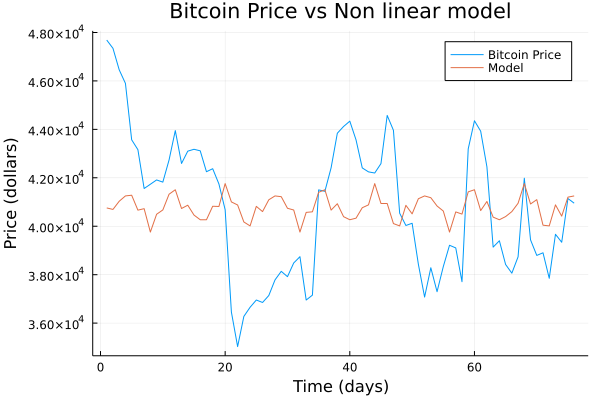

In [202]:
plot(x, y, label = "Bitcoin Price", 
    title = "Bitcoin Price vs Non linear model", 
    xlabel = "Time (days)", 
    ylabel = "Price (dollars)")
plot!(plot!(x, x̂,
     label = "Model"))

Let us make the prediction using the proposed model and plot the solution.

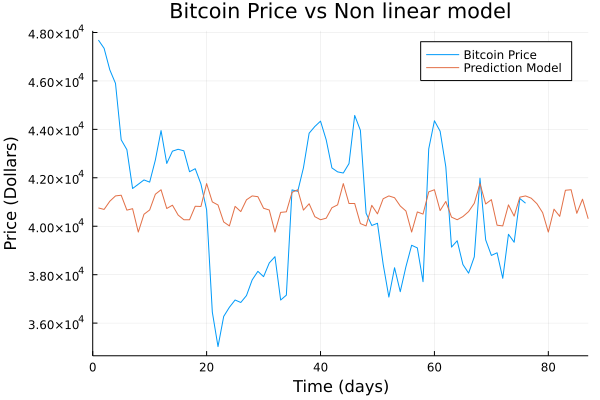

In [203]:
function model_1(x)
    p[1].+ p[2].*sin.(5*π/12*x).+ p[3].*cos.(5*π/4*x).+ p[4].*sin.(7*π/12*x).+ p[5].*cos.(7*π/4*x).+ p[6].*sin.(11*π/12*x).+ p[7].*cos.(11*π/4*x)
end
z = Array((1:87));
plot(x, y, label = "Bitcoin Price", 
    title = "Bitcoin Price vs Non linear model",
    xlabel = "Time (days)",
    ylabel = "Price (Dollars)")
plot!(z, model_1(z),
     label = "Prediction Model",
     xlims = (0, 87),
     ylims = (miny, maxy, 100))

The second model is given by 

\begin{equation*}
a_1 + a_2 x + \frac{a_3}{x} + \frac{a_4}{x^2}
\end{equation*}

we're going to do the same process than the first model to calculate the solution.

In [204]:
B = [ones(N) x x.^(-1) x.^(-2)]

76×4 Matrix{Float64}:
 1.0   1.0  1.0        1.0
 1.0   2.0  0.5        0.25
 1.0   3.0  0.333333   0.111111
 1.0   4.0  0.25       0.0625
 1.0   5.0  0.2        0.04
 1.0   6.0  0.166667   0.0277778
 1.0   7.0  0.142857   0.0204082
 1.0   8.0  0.125      0.015625
 1.0   9.0  0.111111   0.0123457
 1.0  10.0  0.1        0.01
 1.0  11.0  0.0909091  0.00826446
 1.0  12.0  0.0833333  0.00694444
 1.0  13.0  0.0769231  0.00591716
 ⋮                     
 1.0  65.0  0.0153846  0.000236686
 1.0  66.0  0.0151515  0.000229568
 1.0  67.0  0.0149254  0.000222767
 1.0  68.0  0.0147059  0.000216263
 1.0  69.0  0.0144928  0.00021004
 1.0  70.0  0.0142857  0.000204082
 1.0  71.0  0.0140845  0.000198373
 1.0  72.0  0.0138889  0.000192901
 1.0  73.0  0.0136986  0.000187652
 1.0  74.0  0.0135135  0.000182615
 1.0  75.0  0.0133333  0.000177778
 1.0  76.0  0.0131579  0.00017313

In [205]:
#QR descomposition
q = B\y

4-element Vector{Float64}:
  38706.39434430492
     15.38134291784753
  29685.210965139544
 -20895.066805909995

In [206]:
#Apply the obtained model
ŵ = B*q

76-element Vector{Float64}:
 47511.91984645231
 48355.99581123289
 46325.934605226095
 44883.28078189183
 43884.54057968567
 43165.79904028221
 42628.37823350672
 42213.6110394478
 41885.21941674266
 41619.77820193825
 41401.55815615848
 41219.633409150796
 41066.19012023045
     ⋮
 40157.93160933262
 40166.54205330465
 40175.35244362749
 40184.3540534676
 40193.5386565057
 40202.89849156525
 40212.42623019835
 40222.114946944756
 40231.95809201022
 40241.94946613769
 40252.08319746874
 40262.3537202138

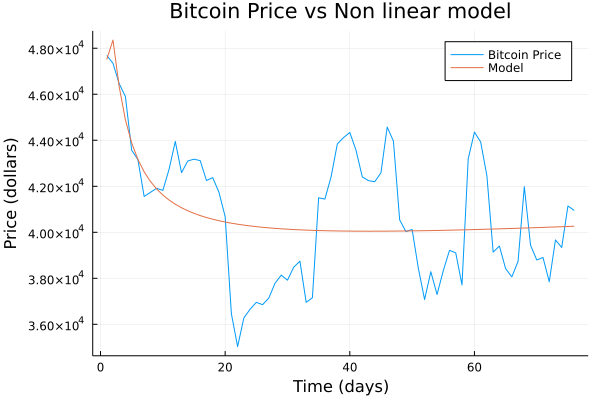

In [207]:
#Plot the new model with the data
plot(x, y, label = "Bitcoin Price", 
    title = "Bitcoin Price vs Non linear model",
    xlabel = "Time (days)", 
    ylabel = "Price (dollars)")
plot!(plot!(x, ŵ,
     label = "Model"))

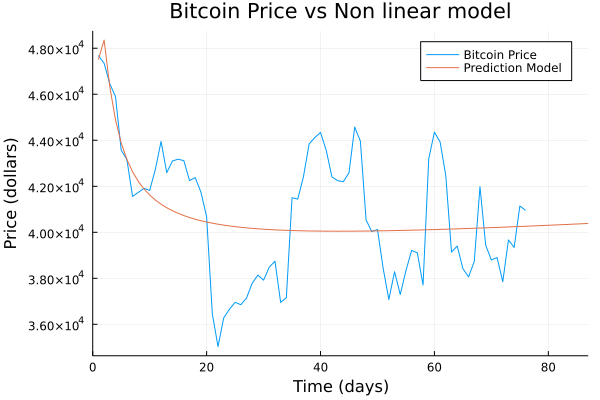

In [208]:
#Prediction 
function model(z)
    q[1].+ q[2].*z.+  q[3].*z.^(-1).+ q[4].*z.^(-2)
end
plot(x, y, label = "Bitcoin Price", 
    title = "Bitcoin Price vs Non linear model",
    xlabel = "Time (days)",
    ylabel ="Price (dollars)")
plot!(z, model(z),
     label = "Prediction Model",
     xlims = (0,87),
     ylims = (miny,maxy, 100))

We are going to compare the values obtained in the prediction of the two non-linear models with the real prices of the dates that go from March 17 to March 27, 2022. 

In [209]:
#Bitcoin price data.
dataBitcoinM = DataFrame(CSV.File("C:/Users/maria/Desktop/Universidad/2022-I/Matemáticas para ML/Databases/Bitcoin_03.csv"))
dataBitcoinM

,Date,Bitcoin_Price
,Date…,Float64
1,2022-03-17,40951.4
2,2022-03-18,41801.2
3,2022-03-19,42190.7
4,2022-03-20,41247.8
5,2022-03-21,41078.0
6,2022-03-22,42358.8
7,2022-03-23,42893.0
8,2022-03-24,43960.9
9,2022-03-25,44348.7


For ease, we take the bitcoin price data and convert it to an array.

In [210]:
ŷ = Array(dataBitcoinM.Bitcoin_Price);
n = size(ŷ,1);

We will take he prediction data that is the application of the model from day 77 to 87 and converted into an array. 

In [211]:
pred1 = model_1.(z[77:87])

11-element Vector{Float64}:
 41157.75
 40929.23760539703
 40561.25
 39758.5
 40704.5
 40407.50723673771
 41486.0
 41506.5
 40533.5
 41116.73737846451
 40309.25

To make the comparison between the prediction model and the real values, we are going to consider the mean squared error and we will see how the model behaves both in training and testing. 

In [212]:
using Metrics

msepred1 = mse.(pred1, ŷ);
msetrai1 = mse.(x̂, y);

Plot the mean squared error behavior.

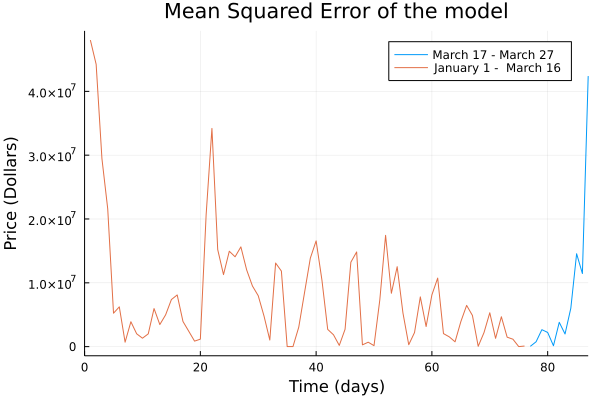

In [213]:
plot(Array((77:87)), msepred1, label = "March 17 - March 27",
     title = "Mean Squared Error of the model",
     xlims = (0, 87),
     xlabel = "Time (days)",
     ylabel = "Price (Dollars)")
plot!(x, msetrai1, label = "January 1 -  March 16")

Now we will do the same with the second model, that is, we will organize the prediction data in a array, then we will calculate the mean squared error and see its behavior during training and testing. 

In [214]:
pred2 = model.(z[77:87])

11-element Vector{Float64}:
 40272.755754968355
 40283.28429052868
 40293.93456707575
 40304.70206060854
 40315.58246851985
 40326.571696217965
 40337.66584470672
 40348.861199044964
 40360.15421761344
 40371.54152212408
 40383.019888312396

In [215]:
#Mean squared error
msepred2 = mse.(pred2, ŷ);
msetrai2 = mse.(ŵ, y);

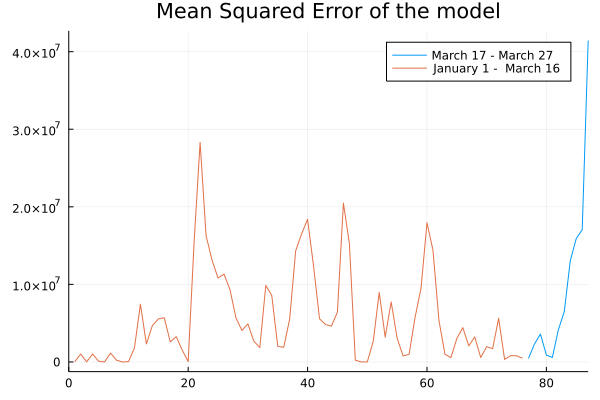

In [216]:
#Plor the mean squared error behavior.
plot(Array((77:87)), msepred2, label = "March 17 - March 27",
     title = "Mean Squared Error of the model",
     xlims = (0, 87))
plot!(x, msetrai2, label = "January 1 -  March 16")

As we can see, the behavior of the errors of both models during training varied a lot and in large proportions, however, the second model has better behavior than the first in terms of training.

The case of prediction is another, since we see that the errors of the models grow too fast, so there is no good prediction. But, if I had to choose the best non-linear model (in terms of prediction) it would be the first, since the growth of its mean squared error is slower than that of the second model. 
